In [1]:
import numpy as np
import matplotlib.pyplot as plt
from large_gcs.contact.contact_location import (
    ContactLocationFace,
    ContactLocationVertex,
)
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import MobilityType, RigidBody
from large_gcs.geometry.geometry_utils import plot_vector
from large_gcs.geometry.polyhedron import Polyhedron

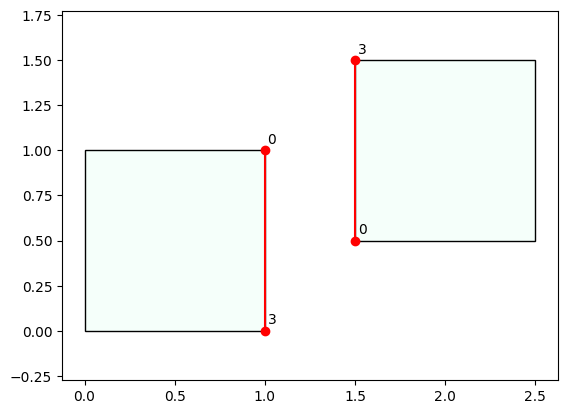

In [2]:
body_a = RigidBody(
    "obj_a",
    Polyhedron.from_vertices([[0, 0], [1, 0], [1, 1], [0, 1]]),
    MobilityType.STATIC,
)
body_b_vert = np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([1.5, 0.5])
body_b = RigidBody(
    "obj_b",
    Polyhedron.from_vertices(body_b_vert),
    MobilityType.UNACTUATED,
)
contact_loc_a = ContactLocationFace(body_a, 3)
contact_loc_b = ContactLocationFace(body_b, 3)
contact_loc_a.plot()
contact_loc_b.plot()
plt.show()

In [3]:
contact_loc_b.body.vars_vel

array([[<Expression "( - obj_b_pos(0, 0) + obj_b_pos(0, 1))">],
       [<Expression "( - obj_b_pos(1, 0) + obj_b_pos(1, 1))">]],
      dtype=object)

In [4]:
expr = create_static_face_movable_face_signed_dist_surrog_exprs(
    contact_loc_a, contact_loc_b
)[0]
assert expr.is_polynomial()
print(expr)

(-1.4999999992657111 + obj_b_pos(0, 0))


In [5]:
vals = [1.5, 0]
env = dict(zip(body_b.vars_pos[0], vals))
dist_surrog = expr.Evaluate(env)
print(dist_surrog)

7.342888519445978e-10


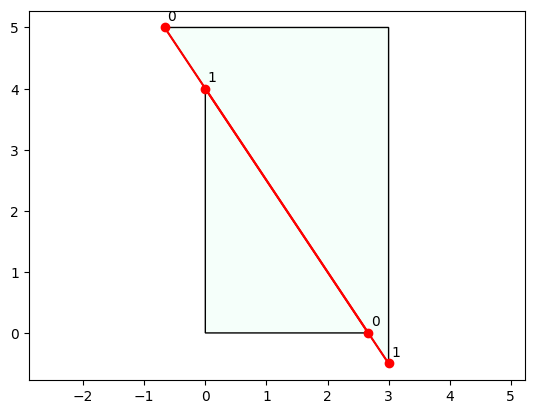

[0.88891193 1.33331008]
[1.7778123  3.16664327]
-0.7692307692307693


In [6]:
body_a = RigidBody(
    "obj_a",
    Polyhedron(A=[[1.5, 1], [-1, 0], [0, -1]], b=[4, 0, 0]),
    MobilityType.STATIC,
)
body_b = RigidBody(
    "obj_b",
    Polyhedron(A=[[-1.5, -1], [1, 0], [0, 1]], b=[-4, 3, 5]),
    MobilityType.UNACTUATED,
)
contact_loc_a = ContactLocationFace(body_a, 0)
contact_loc_b = ContactLocationFace(body_b, 0)
contact_loc_a.plot()
contact_loc_b.plot()
plt.show()
print(body_a.geometry.center)
print(body_b.geometry.center)
expr = create_static_face_movable_face_signed_dist_surrog_exprs(
    contact_loc_a, contact_loc_b
)[0]
vals = body_b.geometry.center + np.array([-1, -1])
env = dict(zip(body_b.vars_pos[0], vals))
dist_surrg = expr.Evaluate(env)
print(dist_surrg)

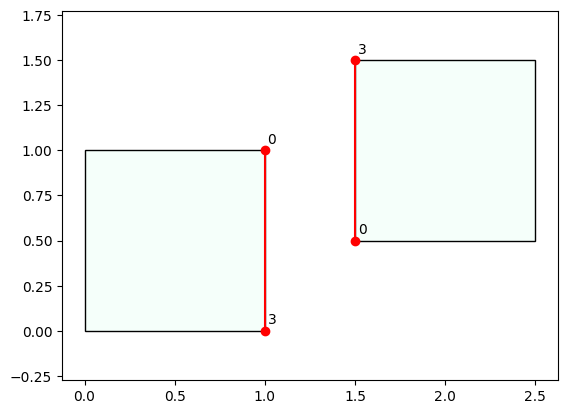

In [7]:
body_a = RigidBody(
    "obj_a",
    Polyhedron.from_vertices([[0, 0], [1, 0], [1, 1], [0, 1]]),
    MobilityType.STATIC,
)
body_b_vert = np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([1.5, 0.5])
body_b = RigidBody(
    "obj_b",
    Polyhedron.from_vertices(body_b_vert),
    MobilityType.UNACTUATED,
)
contact_loc_a = ContactLocationFace(body_a, 3)
contact_loc_b = ContactLocationFace(body_b, 3)
contact_loc_a.plot()
contact_loc_b.plot()
plt.show()

contact_loc_a = ContactLocationFace(body_a, 3)
contact_loc_b = ContactLocationFace(body_b, 3)

In [18]:
formulas = create_static_face_movable_face_horizontal_bounds_formulas(
    contact_loc_a, contact_loc_b
)
# print(formulas)
eps = 1e-6
y_vals = np.linspace(-0.3 + eps, 1.3 - eps, 20)
x_vals = [1.5] * 20
vals_list = list(zip(x_vals, y_vals))
for vals in vals_list:
    vars = body_b.vars_pos.flatten()
    env = dict(zip(vars, vals * body_b.n_pos_points))
    for formula in formulas:
        # print("")
        # print(env)
        # print(formula.item())
        assert formula.item().Evaluate(env)